<a href="https://colab.research.google.com/github/cedricbansah/data-science-practice/blob/master/week_7_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [6]:
data = pd.read_csv('train.csv')
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Probability of picking a house in the neighbourhood "Old Town"

In [7]:
all_houses = data.shape[0]
houses_in_OldTown = data[data['Neighborhood'] == 'OldTown'].shape[0]
print('Probability of picking a house in OldTown: {}'.format(houses_in_OldTown/all_houses))

Probability of picking a house in OldTown: 0.0773972602739726


Probability of picking a house in Oldtown three times without replacement

In [9]:
randprob = (houses_in_OldTown/all_houses)*((houses_in_OldTown-1)/(all_houses-1))*((houses_in_OldTown-2)/(all_houses-2))*((houses_in_OldTown-3)/(all_houses-3))
randprob

3.4149701088772053e-05

Checking the skewness of data

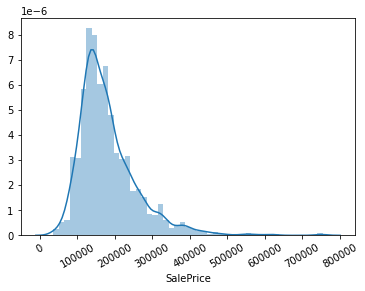

In [8]:
#plot a graph of sale price against its frequency
plt.xticks(rotation = 30)
sns.distplot(data['SalePrice'])

Sample mean and Population mean


*   Consider a sample of 500 houses from 1460 and plot its mean
*   The mean of these 500 houses can be near or far from the mean of the 1460 houses calculated earlier.



In [10]:
np.random.seed(6)
sample_ages = np.random.choice(a=data['SalePrice'],size=500)
print("Sample mean: ",str(sample_ages.mean()))
print("Population mean: ", str(data['SalePrice'].mean()))

Sample mean:  177499.802
Population mean:  180921.19589041095


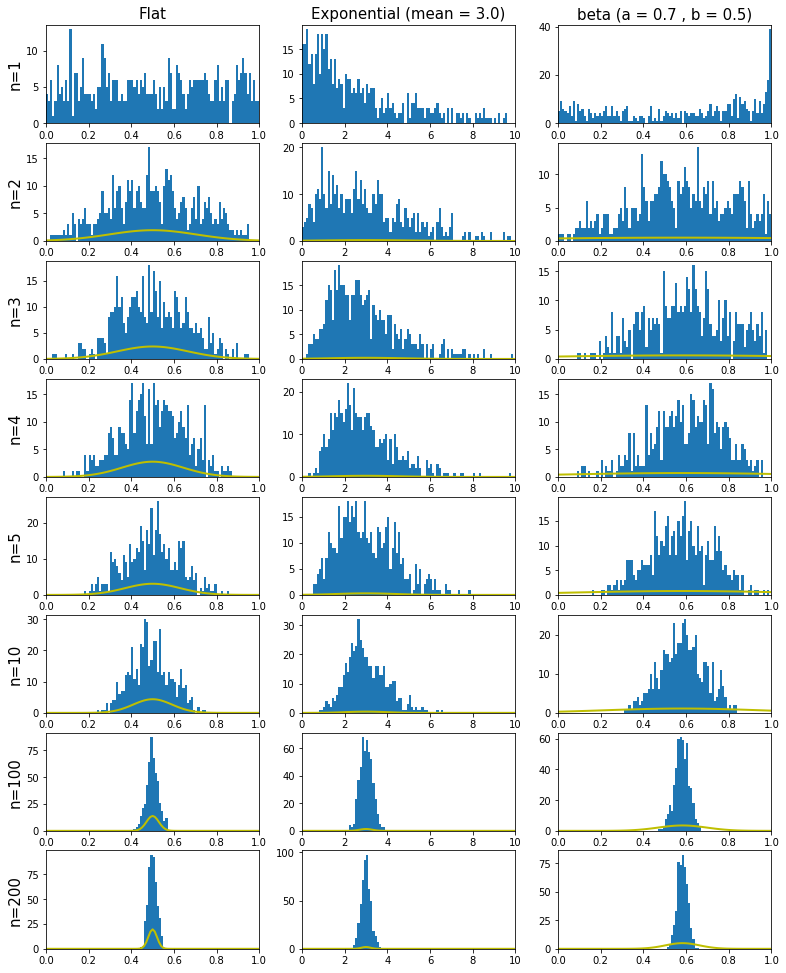

In [11]:
from functools import partial

n = np.array([1,2,3,4,5,10,100,200]) # number of samples to average over
N = 500  # number of times samples of size n are taken. 
nobb = 101  # number of bin boundaries on plots
exp_mean = 3  #mean of exponential distribution
a,b = 0.7,0.5  #parameters of beta distribution
dist = [partial(np.random.random),partial(np.random.exponential,exp_mean),partial(np.random.beta,a,b)]
title_names = ["Flat","Exponential (mean = %.1f)" % exp_mean, "beta (a = %.1f , b = %.1f)" % (a,b)]
drange = np.array([[0,1],[0,10],[0,1]])  # ranges of the three distributions
means = np.array([0.5,exp_mean,a/(a+b)]) # means of the three distributions
var = np.array([1/12,exp_mean**2,a*b/((a+b+1)*(a*b)**2)]) # variances of the three distributions

binrange = np.array([np.linspace(p,q,nobb) for p,q in drange])
ln,ld = len(n),len(dist)
plt.figure(figsize=((ld*4)+1,(ln*2)+1))

for i in range (ln):
  for j in range (ld):
    plt.subplot(ln,ld,i*ld+1+j)
    plt.hist(np.mean(dist[j]((N,n[i])),1),binrange[j],)
    plt.xlim(drange[j])
    if j==0:
        plt.ylabel('n=%i' % n[i],fontsize=15)        
    if i==0:
        plt.title(title_names[j], fontsize=15)
    else:
        clt=(1/(np.sqrt(2*np.pi*var[j]/n[i])))*np.exp(-(((binrange[j]-means[j])**2)*n[i]/(2*var[j])))
        plt.plot(binrange[j],clt,'y',linewidth=2)     
plt.show()

###The Concept of Z-score
It is possible to calculate how many standard deviations a value is from the mean. 
This can be achieved by subtracting the value from the mean and dividing the value by the standard deviation.

z-score = (value - mean)/std

Statistical inference is the process of analyzing sample data to gain insight into the population from which the data was collected and to investigate differences between different data samples.

Point estimates are estimates of population parameters based on sample data

A Confidence Interval is a range of values where we are fairly certain our value lies in 
Interpretation of Confidence Intervals
Let's build our intution, again, with the help of an example. This should help explain how to interpret the Confidence Interval

Example: Apple Orchard

Are the apples big enough?

There are hundreds of apples on the trees, so you randomly choose just 30 and get these results:

Mean: 86
Standard Deviation: 5
Interpretation of Confidence Intervals
We know:

X is the mean = 86
Z is the Z-value = 1.960 (from the table above for 95%)
s is the standard deviation = 5
n is the number of samples = 30
86 ± 1.960 5 = 86 ± (1.79/√30)
So the true mean (of all the hundreds of apples) is likely to be between 84.21 and 87.79

Interpretation of Confidence Intervals
True Mean

Now imagine we get to pick ALL the apples straight away, and get them ALL measured by the packing machine (this is a luxury not normally found in statistics!)

And the true mean turns out to be 84.9

Let's lay all the apples on the ground from smallest to largest:

Each apple is a green dot, except our samples which are blue
Interpretation of Confidence Intervals
Our result was not exact ... it is random after all ... but the true mean is inside our confidence interval of 86 ± 1.79 (in other words 84.21 to 87.79)

But the true mean might not be inside the confidence interval but 95% of the time it will!

### 95% of all "95% Confidence Intervals" will include the true mean

Interpretation of Confidence Intervals
Maybe we had this sample, with a mean of 83.5 and a Standard Deviation of 3.5:

That does not include the true mean. Expect that to happen 5% of the time for a 95% confidence interval.

So how do we know if the sample we took is one of the "lucky" 95% or the unlucky 5%? Unless we get to measure the whole population like above we simply don't know.

This is the risk in sampling, we might have a bad sample. (Important!)

In [12]:
import scipy.stats as stats 
import math 

np.random.seed(10) #initialize the random number generator

sample_size = 1000   # size of sample data
sample = np.random.choice(a = data['SalePrice'], size = sample_size)   # extracting the sample from the population
sample_mean = sample.mean()   # mean of the sample data

z_critical = stats.norm.ppf(q=0.95)  # z score for 95%
print("z-score: ", z_critical)  # display the z score

pop_stdev = data['SalePrice'].std()   # get the standard deviation of the population

margin_of_error = z_critical * (pop_stdev/math.sqrt(sample_size))  # get the margin of error

conf_interval = (sample_mean - margin_of_error, sample_mean + margin_of_error)

print("Confidence interval: ", end = " ")
print(conf_interval)
print("True Mean: {}".format(data['SalePrice'].mean()))

z-score:  1.6448536269514722
Confidence interval:  (178338.05201966673, 186602.42998033328)
True Mean: 180921.19589041095


Notice that the true mean is contained in our interval.
A confidence interval of 95% would mean that if we take many samples and create confidence intervals for each of them, 95% of our samples' confidence intervals will contain the true population mean.
Now, let's create several confidence intervals and plot them to get a better sense of what it means to "capture" the true mean

In [14]:
np.random.seed(12)

newsample_size = 500

intervals = []
sample_means = []  # empty list to store sample means 
for sample in range(25):
  sample = np.random.choice(a = data['SalePrice'], size = newsample_size)  #get sample from the population
  
  newsample_mean = sample.mean()  # get sample mean 
  sample_means.append(newsample_mean)  # add sample mean to list 
  
  z_score = stats.norm.ppf(q = 0.975)  # get z-score for 97.5%

  new_pop_stdev = data['SalePrice'].std()

  margin_of_error = z_score * (new_pop_stdev/math.sqrt(newsample_size))

  confidence_interval = (margin_of_error + 1,
                         margin_of_error - 1)
  intervals.append(confidence_interval)

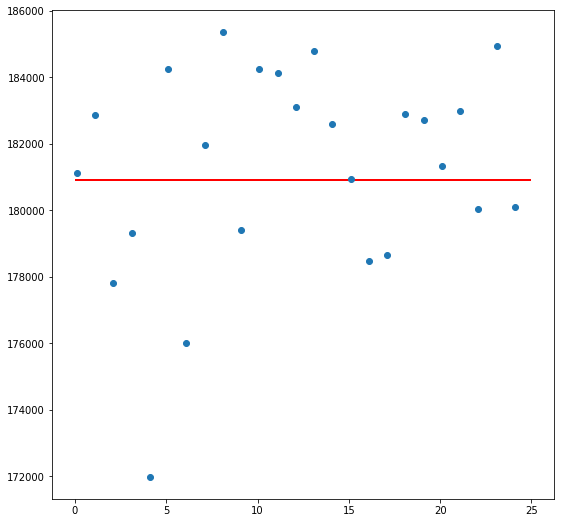

In [23]:
plt.figure(figsize=(9,9))

plt.errorbar(x=np.arange(0.1,25,1),
             y = sample_means,
             yerr=[(top-bot)/2 for top,bot in intervals],
             fmt = 'o')
plt.hlines(xmin = 0, xmax = 25,
           y = data['SalePrice'].mean(),
           linewidth = 2.0,
           color = 'red')